<a href="https://colab.research.google.com/github/nishi1612/Machine-Learning/blob/master/IE406_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

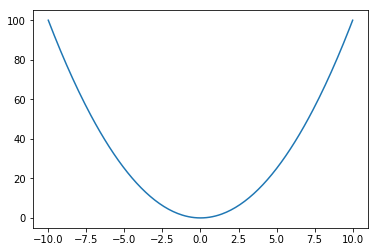

In [0]:
l = np.linspace(-10,10,201)
plt.plot(l,l**2)
plt.show()

In [0]:
l_theta = np.zeros((l.shape[0],l.shape[0]))
for i in range(l.shape[0]):
  for j in range(l.shape[0]):
    l_theta[i][j] = l[i]**2 + l[j]**2
l_theta

array([[200.  , 198.01, 196.04, ..., 196.04, 198.01, 200.  ],
       [198.01, 196.02, 194.05, ..., 194.05, 196.02, 198.01],
       [196.04, 194.05, 192.08, ..., 192.08, 194.05, 196.04],
       ...,
       [196.04, 194.05, 192.08, ..., 192.08, 194.05, 196.04],
       [198.01, 196.02, 194.05, ..., 194.05, 196.02, 198.01],
       [200.  , 198.01, 196.04, ..., 196.04, 198.01, 200.  ]])

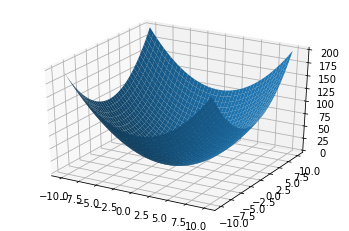

In [0]:
theta1,theta2 = np.meshgrid(l,l)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X=theta1,Y=theta2,Z=l_theta)

In [0]:
from google.colab import files
uploaded = files.upload()

Saving data(1).csv to data(1).csv


In [0]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['data(1).csv']))

In [0]:
df.index

RangeIndex(start=0, stop=94, step=1)

In [0]:
x = df['x']
y = df['y']

In [0]:
x = (x-np.mean(x))/np.std(x)

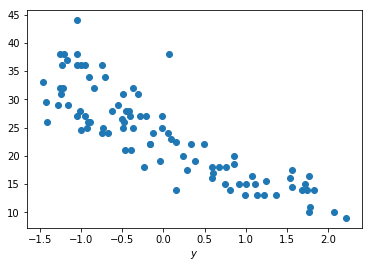

In [0]:
plt.scatter(x,y)
plt.xlabel('$x$')
plt.xlabel('$y$')
plt.show()

In [0]:
theta_cost = np.zeros((l.shape[0],l.shape[0]))
for i in range(l.shape[0]):
  for j in range(l.shape[0]):
    cost = 0 
    for k in range(len(x)):
      hx = x[k]*l[i] + l[j]
      cost += (hx-y[k])**2
    theta_cost[i][j] = cost

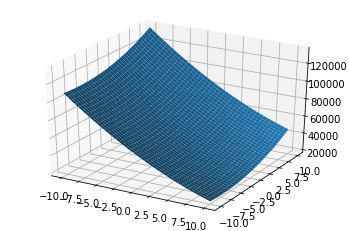

In [0]:
theta1,theta2 = np.meshgrid(l,l)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X=theta1,Y=theta2,Z=theta_cost)

In [0]:
def calculate_mse(y_predicted,y,N):
  mse = np.sum((y_predicted - y)**2)
  return mse/N

In [0]:
def predict_output(X,weight):
  return np.matmul(X,weight)

In [0]:
def closed_form(X,Y_noise):
  a = np.linalg.inv(np.matmul(X.transpose(),X))
  b = np.matmul(a,X.transpose())
  weight_predicted = np.matmul(b,Y_noise)
  y_predicted = predict_output(X,weight_predicted)
  return weight_predicted, y_predicted

In [0]:
x = x.values

In [0]:
X = np.reshape(x,(x.shape[0],1))
X = np.concatenate((X,np.ones((X.shape[0],1))),axis=1)
X.shape

(94, 2)

In [0]:
weight_preicted, y_predicted = closed_form(X,y.values)
mse = calculate_mse(y_predicted,y.values,X.shape[0])
mse

16.730323052045662

In [0]:
weight_preicted

array([-6.86699545, 23.71808511])

In [0]:
mini = 10000000
ans = []
for i in range(l.shape[0]):
  for j in range(l.shape[0]):
    if(l_theta[i][j]<mini):
      mini=l_theta[i][j]
      ans = [l[i],l[j]]
ans

[0.0, 0.0]